### Needed libraries

In [1]:
#data structure
import numpy as np
import pandas as pd

#statistical library
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
#plots
import matplotlib.pyplot as plt
import seaborn as sns

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


#Model tranning and testing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.model_selection import KFold


#Model accuracy meaurements
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import learning_curve

In [2]:
data=pd.read_csv(r"C:\Users\123cr\Desktop\OBL 2 project\Marketing stratergy old.csv")
data

food_category  store_sales(in millions)  store_cost(in millions)  \
0     Breakfast Foods                      5.52                   2.5944   
1     Breakfast Foods                      3.68                   1.1776   
2     Breakfast Foods                      5.44                   2.5568   
3     Breakfast Foods                      3.74                   1.6082   
4     Breakfast Foods                      4.08                   1.4688   
...               ...                       ...                      ...   
8111        Specialty                      6.90                   2.2770   
8112        Specialty                      4.80                   2.3520   
8113        Specialty                      2.97                   0.9504   
8114        Specialty                      5.52                   2.0424   
8115        Specialty                      8.28                   2.5668   

      unit_sales(in millions)         promotion_name sales_country  \
0                           3  Cash Register Lottery           USA   
1                           2  Cash Register Lottery           USA   
2                           4  Cash Register Lottery           USA   
3                           2  Cash Register Lottery           USA   
4                           3  Cash Register Lottery           USA   
...                       ...                    ...           ...   
8111                        3      Pick Your Savings        Mexico   
8112                        3           Super Savers        Mexico   
8113                        3           Super Savers        Mexico   
8114                        2             Sales Days           USA   
8115                        3             Sales Days        Canada   

     marital_status gender            education member_card  ...  \
0                 M      M     Bachelors Degree      Silver  ...   
1                 M      F   High School Degree      Bronze  ...   
2                 S      F   High School Degree      Bronze  ...   
3                 S      M  Partial High School      Bronze  ...   
4                 S      F  Partial High School      Normal  ...   
...             ...    ...                  ...         ...  ...   
8111              S      F     Bachelors Degree      Silver  ...   
8112              M      F     Bachelors Degree      Silver  ...   
8113              M      F  Partial High School      Normal  ...   
8114              S      M   High School Degree      Bronze  ...   
8115              S      M     Bachelors Degree      Bronze  ...   

     avg yearly_income          store_type   store_city store_state  \
0          $50K - $70K  Deluxe Supermarket        Salem          OR   
1          $30K - $50K  Deluxe Supermarket        Salem          OR   
2          $30K - $50K  Deluxe Supermarket        Salem          OR   
3          $50K - $70K  Deluxe Supermarket        Salem          OR   
4          $10K - $30K  Deluxe Supermarket        Salem          OR   
...                ...                 ...          ...         ...   
8111       $50K - $70K  Deluxe Supermarket      Hidalgo   Zacatecas   
8112       $50K - $70K    Mid-Size Grocery  Mexico City          DF   
8113       $10K - $30K    Mid-Size Grocery  Mexico City          DF   
8114       $30K - $50K         Supermarket    Bremerton          WA   
8115       $70K - $90K    Mid-Size Grocery     Victoria          BC   

     store_sqft  grocery_sqft  frozen_sqft  meat_sqft  \
0         27694         18670         5415       3610   
1         27694         18670         5415       3610   
2         27694         18670         5415       3610   
3         27694         18670         5415       3610   
4         27694         18670         5415       3610   
...         ...           ...          ...        ...   
8111      30584         21938         5188       3458   
8112      36509         22450         8435       5624   
8113      36509         22450         8435       5624   
8114      3969

In [3]:
data.columns

Index(['food_category', 'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'education', 'member_card', 'occupation',
       'avg yearly_income', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'media_type',
       'cost'],
      dtype='object')

In [4]:
data=data[['avg yearly_income','occupation','store_type','member_card']]
data

avg yearly_income      occupation          store_type member_card
0          $50K - $70K    Professional  Deluxe Supermarket      Silver
1          $30K - $50K          Manual  Deluxe Supermarket      Bronze
2          $30K - $50K  Skilled Manual  Deluxe Supermarket      Bronze
3          $50K - $70K          Manual  Deluxe Supermarket      Bronze
4          $10K - $30K  Skilled Manual  Deluxe Supermarket      Normal
...                ...             ...                 ...         ...
8111       $50K - $70K    Professional  Deluxe Supermarket      Silver
8112       $50K - $70K    Professional    Mid-Size Grocery      Silver
8113       $10K - $30K  Skilled Manual    Mid-Size Grocery      Normal
8114       $30K - $50K          Manual         Supermarket      Bronze
8115       $70K - $90K    Professional    Mid-Size Grocery      Bronze

[8116 rows x 4 columns]

### dataset structure

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   avg yearly_income  8116 non-null   object
 1   occupation         8116 non-null   object
 2   store_type         8116 non-null   object
 3   member_card        8116 non-null   object
dtypes: object(4)
memory usage: 253.8+ KB


In [6]:
data.describe()

avg yearly_income    occupation          store_type member_card
count               8116          8116                8116        8116
unique                 8             5                   5           4
top          $30K - $50K  Professional  Deluxe Supermarket      Bronze
freq                2657          2739                3712        4520

In [7]:
data.isnull().sum()

avg yearly_income    0
occupation           0
store_type           0
member_card          0
dtype: int64

In [8]:
for column in data:
    unique_vals = np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.
              format(column, 
        nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.
              format(column, nr_values))

The number of values for feature avg yearly_income :8 -- ['$10K - $30K' '$110K - $130K' '$130K - $150K' '$150K +' '$30K - $50K'
 '$50K - $70K' '$70K - $90K' '$90K - $110K']
The number of values for feature occupation :5 -- ['Clerical' 'Management' 'Manual' 'Professional' 'Skilled Manual']
The number of values for feature store_type :5 -- ['Deluxe Supermarket' 'Gourmet Supermarket' 'Mid-Size Grocery'
 'Small Grocery' 'Supermarket']
The number of values for feature member_card :4 -- ['Bronze' 'Golden' 'Normal' 'Silver']


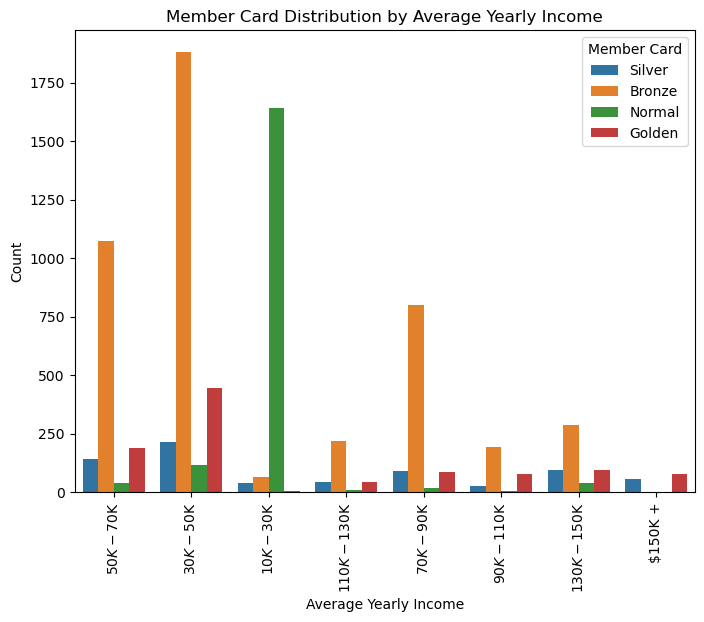

In [9]:
# Create a barplot
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
sns.countplot(x='avg yearly_income', hue='member_card', data=data)
plt.title('Member Card Distribution by Average Yearly Income')
plt.xlabel('Average Yearly Income')
plt.ylabel('Count')
plt.legend(title='Member Card')

# Show the plot
plt.show()

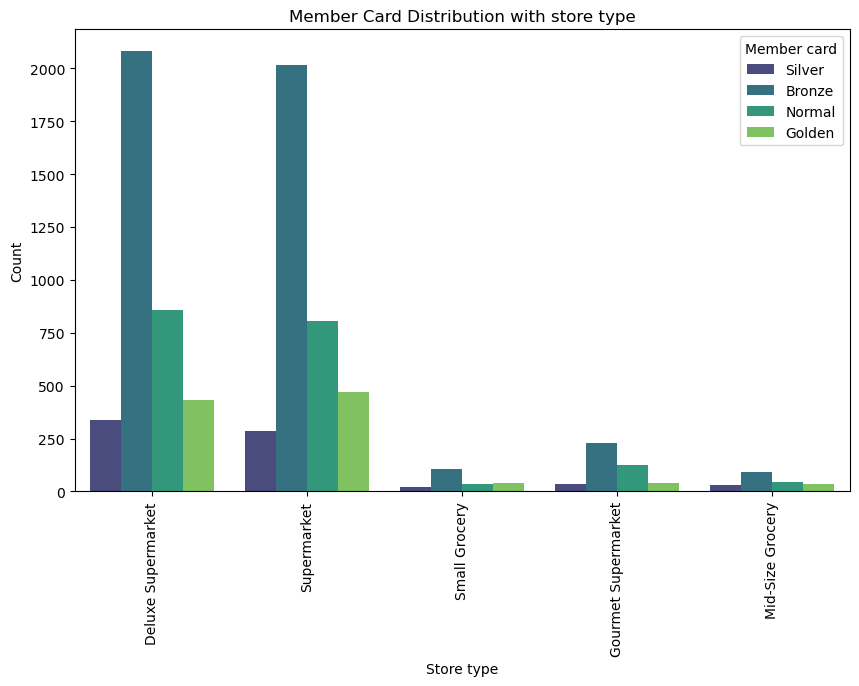

In [10]:
# Create a stacked barplot
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.countplot(x='store_type', hue='member_card', data=data , palette='viridis', dodge=True)
plt.title('Member Card Distribution with store type')
plt.xlabel('Store type')
plt.ylabel('Count')
plt.legend(title='Member card')

### dataset balance

Text(0.5, 1.0, 'Bar Chart of member card\xa0Variable')

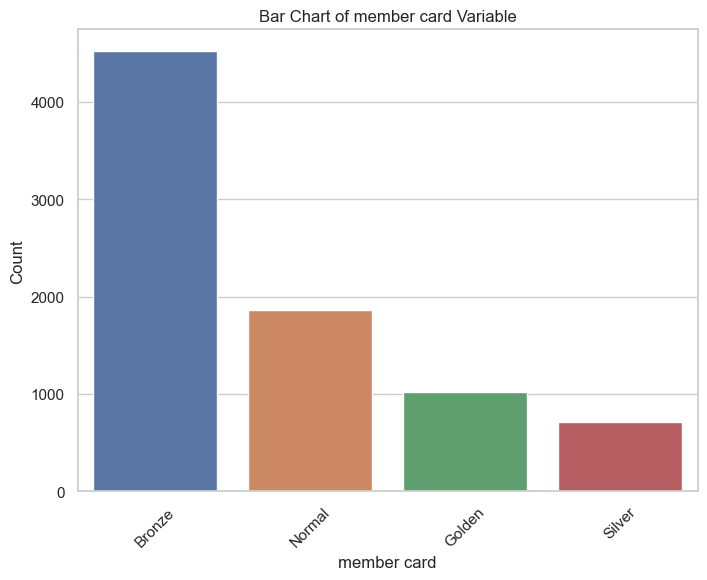

In [11]:
#checking dataset that balance or imbalance
data1= data['member_card'].value_counts().reset_index()
data1.columns = ['member_card', 'count']

# Create a bar plot using Seaborn
sns.set(style="whitegrid")  # Optional: Set a style
plt.figure(figsize=(8, 6))
plt.xticks(rotation=45)

# Create the bar chart
sns.barplot(x="member_card", y="count", data=data1)

# Adding labels and title
plt.xlabel("member card")
plt.ylabel("Count")
plt.title("Bar Chart of member card Variable")

### distribution

In [12]:
data['member_card']

0       Silver
1       Bronze
2       Bronze
3       Bronze
4       Normal
         ...  
8111    Silver
8112    Silver
8113    Normal
8114    Bronze
8115    Bronze
Name: member_card, Length: 8116, dtype: object

In [13]:
#label endcoding
member_card=['Silver','Bronze','Normal','Golden']
Values=[1,2,3,4]
data['member_card'].replace(member_card,Values,inplace=True)
data['member_card'] = data['member_card'].astype('Int64')


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   avg yearly_income  8116 non-null   object
 1   occupation         8116 non-null   object
 2   store_type         8116 non-null   object
 3   member_card        8116 non-null   Int64 
dtypes: Int64(1), object(3)
memory usage: 261.7+ KB


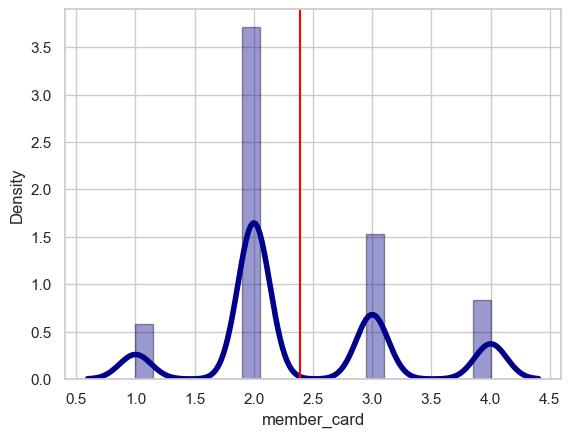

In [15]:
sns.distplot(data['member_card'], hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
mean=data['member_card'].mean()
plt.axvline(mean,0,1,color='red')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   avg yearly_income  8116 non-null   object
 1   occupation         8116 non-null   object
 2   store_type         8116 non-null   object
 3   member_card        8116 non-null   Int64 
dtypes: Int64(1), object(3)
memory usage: 261.7+ KB


In [17]:
print(data.columns)

Index(['avg yearly_income', 'occupation', 'store_type', 'member_card'], dtype='object')


### dummy assigning

In [18]:
Dummy_column=['occupation','avg yearly_income','store_type']

In [19]:
data=pd.get_dummies(data,columns =Dummy_column,dtype=int)
data

member_card  occupation_Clerical  occupation_Management  \
0               1                    0                      0   
1               2                    0                      0   
2               2                    0                      0   
3               2                    0                      0   
4               3                    0                      0   
...           ...                  ...                    ...   
8111            1                    0                      0   
8112            1                    0                      0   
8113            3                    0                      0   
8114            2                    0                      0   
8115            2                    0                      0   

      occupation_Manual  occupation_Professional  occupation_Skilled Manual  \
0                     0                        1                          0   
1                     1                        0                          0   
2                     0                        0                          1   
3                     1                        0                          0   
4                     0                        0                          1   
...                 ...                      ...                        ...   
8111                  0                        1                          0   
8112                  0                        1                          0   
8113                  0                        0                          1   
8114                  1                        0                          0   
8115                  0                        1                          0   

      avg yearly_income_$10K - $30K  avg yearly_income_$110K - $130K  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 1                                0   
...                             ...                              ...   
8111                              0                                0   
8112                              0                                0   
8113                              1                                0   
8114                              0                                0   
8115                              0                                0   

      avg yearly_income_$130K - $150K  avg yearly_income_$150K +  \
0                                   0                          0   
1                                   0                          0   
2                                   0                          0   
3                                   0                          0   
4                                   0                          0   
...                               ...                        ...   
8111                                0                          0   
8112                                0                          0   
8113                                0                          0   
8114                                0                          0   
8115                                0                          0   

      avg yearly_income_$30K - $50K  avg yearly_income_$50K - $70K  \
0                                 0                              1   
1                                 1                              0   
2                                 1                              0   
3                                 0                              1   
4                                 0                              0   
...                             ...                            ...   
8111                              0                              1   
8112                              

### defining x and y

In [20]:
x= data.drop('member_card',axis=1)
y= data['member_card']
x

occupation_Clerical  occupation_Management  occupation_Manual  \
0                       0                      0                  0   
1                       0                      0                  1   
2                       0                      0                  0   
3                       0                      0                  1   
4                       0                      0                  0   
...                   ...                    ...                ...   
8111                    0                      0                  0   
8112                    0                      0                  0   
8113                    0                      0                  0   
8114                    0                      0                  1   
8115                    0                      0                  0   

      occupation_Professional  occupation_Skilled Manual  \
0                           1                          0   
1                           0                          0   
2                           0                          1   
3                           0                          0   
4                           0                          1   
...                       ...                        ...   
8111                        1                          0   
8112                        1                          0   
8113                        0                          1   
8114                        0                          0   
8115                        1                          0   

      avg yearly_income_$10K - $30K  avg yearly_income_$110K - $130K  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 1                                0   
...                             ...                              ...   
8111                              0                                0   
8112                              0                                0   
8113                              1                                0   
8114                              0                                0   
8115                              0                                0   

      avg yearly_income_$130K - $150K  avg yearly_income_$150K +  \
0                                   0                          0   
1                                   0                          0   
2                                   0                          0   
3                                   0                          0   
4                                   0                          0   
...                               ...                        ...   
8111                                0                          0   
8112                                0                          0   
8113                                0                          0   
8114                                0                          0   
8115                                0                          0   

      avg yearly_income_$30K - $50K  avg yearly_income_$50K - $70K  \
0                                 0                              1   
1                                 1                              0   
2                                 1                              0   
3                                 0                              1   
4                                 0                              0   
...                             ...                            ...   
8111                              0                              1   
8112                              0                              1   
8113                              0                              0   
8114                              1               

In [21]:
data.shape

(8116, 19)

### Treating Imbalance(SMOTE over sampling)

In [22]:
y.value_counts()

member_card
2    4520
3    1866
4    1019
1     711
Name: count, dtype: Int64

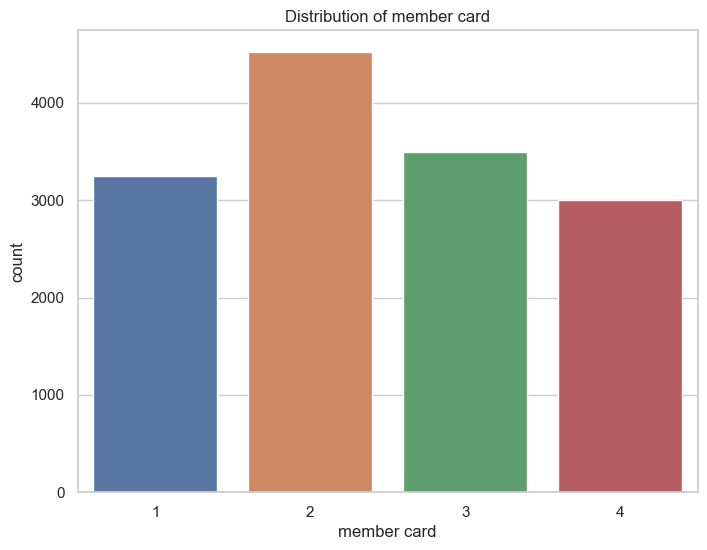

In [23]:
sample_strategy={3:3500,4:3000,1:3250}
oversample=SMOTE(sampling_strategy=sample_strategy,k_neighbors=2,random_state=10)
x,y=oversample.fit_resample(x,y)
plt.figure(figsize=(8,6))
sns.countplot(x=y,order=sorted(data['member_card'].unique()))
plt.xlabel('member card')
plt.ylabel('count')
plt.title('Distribution of member card')
plt.show()

## Before Dimensionality reduction

### Spliting and Scaler fitting

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8,random_state=10)

In [25]:
scaler= MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

### Logistic Regression

#### Hyperparameter Tuning

In [26]:
%%time
parameter1={
    'C':[20,30,40],
    'fit_intercept':[True,False],
    'class_weight':[None,'balanced'],
    'solver':['lbfgs','sag','saga'],
    'max_iter':[1,50,100],
    'penalty':['l1','l2'],
    'l1_ratio': [0.25, 0.5, 0.75,1.0]}

grid_search = GridSearchCV(LogisticRegression(),parameter1,cv=5, scoring='accuracy')
grid_search.fit(xtrain,ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'C': 30, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Test accuracy: 0.5914505956552207
CPU times: total: 39min 37s
Wall time: 10min 46s


In [27]:
model=LogisticRegression(C= 30,class_weight=None,fit_intercept=True,l1_ratio=0.25,max_iter=100,penalty= 'l2',solver='lbfgs')
model.fit(xtrain, ytrain)
prediction = model.predict(xtest)
prediction

array([2., 1., 3., ..., 1., 2., 2.])

In [28]:
c_matrix= confusion_matrix(ytest, prediction)
print(c_matrix)

[[193 385  32  38]
 [ 82 736   9  53]
 [ 16  69 640   7]
 [ 88 384   3 119]]


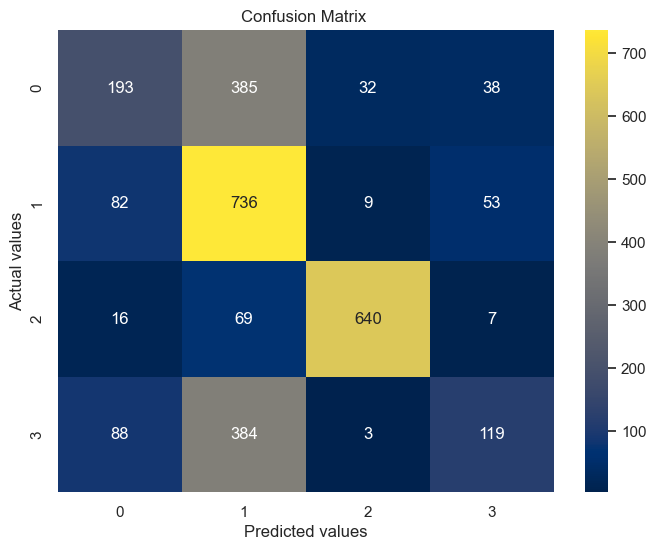

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='cividis')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix ')
plt.show()

In [30]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

         1.0       0.51      0.30      0.38       648
         2.0       0.47      0.84      0.60       880
         3.0       0.94      0.87      0.90       732
         4.0       0.55      0.20      0.29       594

    accuracy                           0.59      2854
   macro avg       0.62      0.55      0.54      2854
weighted avg       0.61      0.59      0.56      2854



#### Learning curve

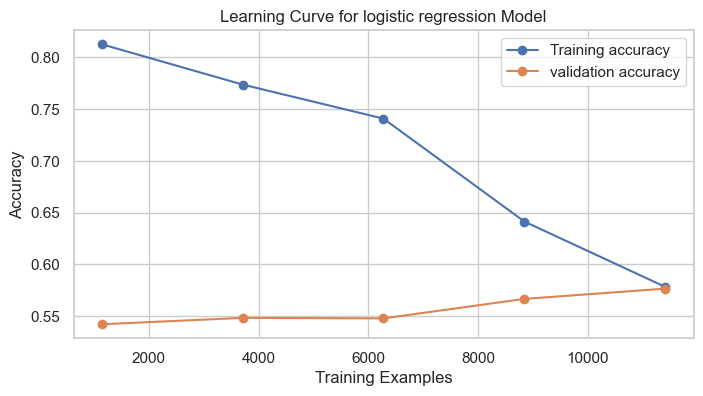

In [31]:
train_sizes, train_scores, test_scores = learning_curve(model,x,y,scoring='accuracy')
train_scores_mean=np.mean(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)

plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean,'o-',label='Training accuracy')
plt.plot(train_sizes, test_scores_mean,'o-',label='validation accuracy')
    
plt.title('Learning Curve for logistic regression Model')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [32]:
best_parameters = {'C': 30, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
final_model = OneVsRestClassifier(LogisticRegression(**best_parameters))
final_model.fit(xtrain,ytrain)
final_ypred=final_model.predict(xtest)
prob=final_model.predict_proba(xtest)

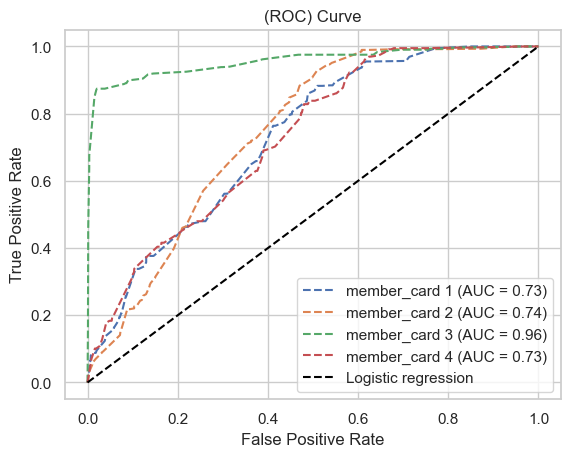

In [33]:
y_test_binarized = label_binarize(ytest, classes=np.unique(ytest))

fpr = {}
tpr = {}
thresh = {}
roc_auc = {}

n_class = y_test_binarized.shape[1]

# Plot ROC curve for each class
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'member_card {np.unique(ytest)[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Logistic regression')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend()
plt.show()

## After Dimensionality reduction

In [34]:
x= data.drop('member_card',axis=1)
y= data['member_card']
x

occupation_Clerical  occupation_Management  occupation_Manual  \
0                       0                      0                  0   
1                       0                      0                  1   
2                       0                      0                  0   
3                       0                      0                  1   
4                       0                      0                  0   
...                   ...                    ...                ...   
8111                    0                      0                  0   
8112                    0                      0                  0   
8113                    0                      0                  0   
8114                    0                      0                  1   
8115                    0                      0                  0   

      occupation_Professional  occupation_Skilled Manual  \
0                           1                          0   
1                           0                          0   
2                           0                          1   
3                           0                          0   
4                           0                          1   
...                       ...                        ...   
8111                        1                          0   
8112                        1                          0   
8113                        0                          1   
8114                        0                          0   
8115                        1                          0   

      avg yearly_income_$10K - $30K  avg yearly_income_$110K - $130K  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 1                                0   
...                             ...                              ...   
8111                              0                                0   
8112                              0                                0   
8113                              1                                0   
8114                              0                                0   
8115                              0                                0   

      avg yearly_income_$130K - $150K  avg yearly_income_$150K +  \
0                                   0                          0   
1                                   0                          0   
2                                   0                          0   
3                                   0                          0   
4                                   0                          0   
...                               ...                        ...   
8111                                0                          0   
8112                                0                          0   
8113                                0                          0   
8114                                0                          0   
8115                                0                          0   

      avg yearly_income_$30K - $50K  avg yearly_income_$50K - $70K  \
0                                 0                              1   
1                                 1                              0   
2                                 1                              0   
3                                 0                              1   
4                                 0                              0   
...                             ...                            ...   
8111                              0                              1   
8112                              0                              1   
8113                              0                              0   
8114                              1               

In [35]:
#for this model random_state=15 and max_depth=10 is the optimal amount because under those values the decision tree classifier's 
# scores are defferentiating in a high level and there is no change when we exceeding those values.
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [36]:
for i, column in enumerate(data.drop('member_card', axis = 1)):
    fi= pd.DataFrame({'Variable': [column], 'Feature Importance Score': 
                       [dt.feature_importances_[i]]})
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
Final=final_fi.sort_values('Feature Importance Score',ascending=False).reset_index()
Final

index                         Variable  Feature Importance Score
0       5    avg yearly_income_$10K - $30K                  0.777854
1       8        avg yearly_income_$150K +                  0.047419
2      13    store_type_Deluxe Supermarket                  0.030519
3      17           store_type_Supermarket                  0.030154
4       3          occupation_Professional                  0.026659
5       7  avg yearly_income_$130K - $150K                  0.010217
6      14   store_type_Gourmet Supermarket                  0.010021
7      12   avg yearly_income_$90K - $110K                  0.009474
8       9    avg yearly_income_$30K - $50K                  0.007982
9      11    avg yearly_income_$70K - $90K                  0.007550
10      0              occupation_Clerical                  0.007197
11      4        occupation_Skilled Manual                  0.007184
12     15      store_type_Mid-Size Grocery                  0.006598
13      2                occupation_Manual                  0.006229
14     16         store_type_Small Grocery                  0.005444
15      6  avg yearly_income_$110K - $130K                  0.004600
16     10    avg yearly_income_$50K - $70K                  0.003584
17      1            occupation_Management                  0.001313

In [37]:
feature_importances = dt.feature_importances_ >0.00544
selected_features = x.columns[feature_importances]
x_selected = data[selected_features]
x=x_selected
x

occupation_Clerical  occupation_Manual  occupation_Professional  \
0                       0                  0                        1   
1                       0                  1                        0   
2                       0                  0                        0   
3                       0                  1                        0   
4                       0                  0                        0   
...                   ...                ...                      ...   
8111                    0                  0                        1   
8112                    0                  0                        1   
8113                    0                  0                        0   
8114                    0                  1                        0   
8115                    0                  0                        1   

      occupation_Skilled Manual  avg yearly_income_$10K - $30K  \
0                             0                              0   
1                             0                              0   
2                             1                              0   
3                             0                              0   
4                             1                              1   
...                         ...                            ...   
8111                          0                              0   
8112                          0                              0   
8113                          1                              1   
8114                          0                              0   
8115                          0                              0   

      avg yearly_income_$130K - $150K  avg yearly_income_$150K +  \
0                                   0                          0   
1                                   0                          0   
2                                   0                          0   
3                                   0                          0   
4                                   0                          0   
...                               ...                        ...   
8111                                0                          0   
8112                                0                          0   
8113                                0                          0   
8114                                0                          0   
8115                                0                          0   

      avg yearly_income_$30K - $50K  avg yearly_income_$70K - $90K  \
0                                 0                              0   
1                                 1                              0   
2                                 1                              0   
3                                 0                              0   
4                                 0                              0   
...                             ...                            ...   
8111                              0                              0   
8112                              0                              0   
8113                              0                              0   
8114                              1                              0   
8115                              0                              1   

      avg yearly_income_$90K - $110K  store_type_Deluxe Supermarket  \
0                                  0                              1   
1                                  0                              1   
2                                  0                              1   
3                                  0                              1   
4                                  0                              1   
...                              ...                            ...   
8111                               0                              1   
8112                               0                              0   
8113                               0   

### Treating Imbalance(SMOTE over sampling)

In [38]:
y.value_counts()

member_card
2    4520
3    1866
4    1019
1     711
Name: count, dtype: Int64

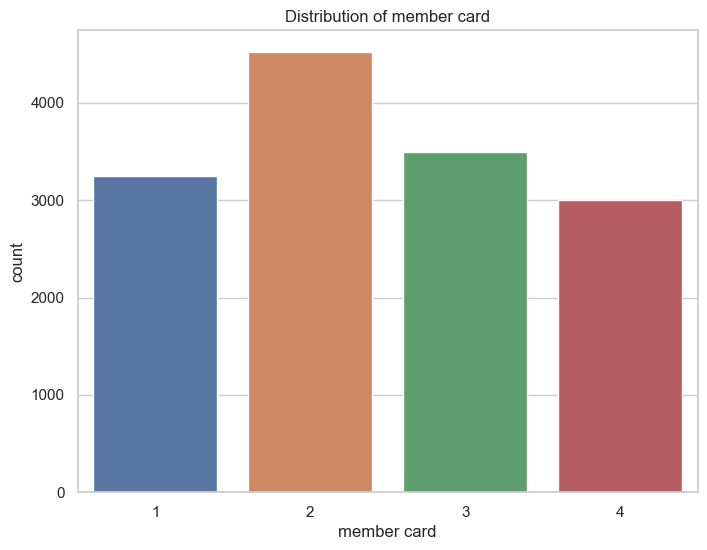

In [39]:
sample_strategy={3:3500,4:3000,1:3250}
oversample=SMOTE(sampling_strategy=sample_strategy,k_neighbors=2,random_state=10)
x,y=oversample.fit_resample(x,y)
plt.figure(figsize=(8,6))
sns.countplot(x=y,order=sorted(data['member_card'].unique()))
plt.xlabel('member card')
plt.ylabel('count')
plt.title('Distribution of member card')
plt.show()

### Spliting and Scaler fitting

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8,random_state=10)

In [41]:
scaler= MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

### Logistic Regression

#### Hyperparameter tuning

In [42]:
%%time
parameter1={
    'C':[20,30,40],
    'fit_intercept':[True,False],
    'class_weight':[None,'balanced'],
    'solver':['lbfgs','sag','saga'],
    'max_iter':[1,50,100],
    'penalty':['l1','l2'],
    'l1_ratio': [0.25, 0.5, 0.75,1.0]}

grid_search = GridSearchCV(LogisticRegression(),parameter1,cv=5, scoring='accuracy')
grid_search.fit(xtrain,ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'C': 20, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.75, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}
Test accuracy: 0.5760336370007008
CPU times: total: 31min 41s
Wall time: 7min 48s


In [49]:
model=LogisticRegression(C= 20,class_weight=None,fit_intercept=True,l1_ratio=0.75,max_iter=100,penalty= 'l2',solver='sag')
model.fit(xtrain, ytrain)
prediction = model.predict(xtest)
prediction

array([4., 2., 3., ..., 2., 2., 1.])

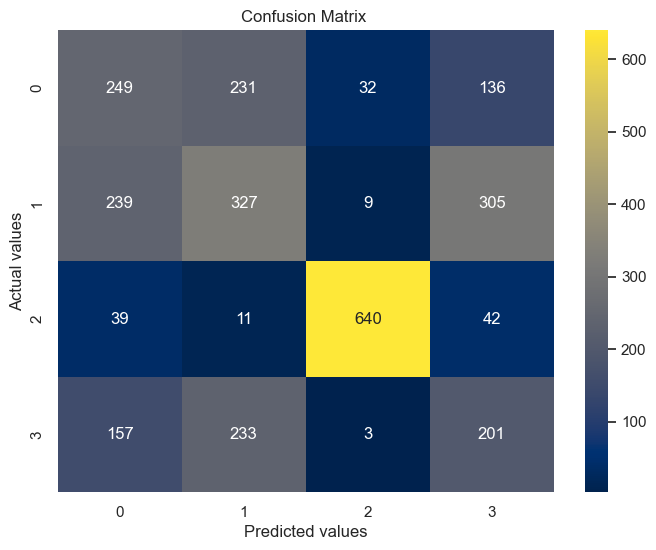

In [50]:
c_matrix= confusion_matrix(ytest, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='cividis')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix ')
plt.show()

In [51]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

         1.0       0.36      0.38      0.37       648
         2.0       0.41      0.37      0.39       880
         3.0       0.94      0.87      0.90       732
         4.0       0.29      0.34      0.31       594

    accuracy                           0.50      2854
   macro avg       0.50      0.49      0.50      2854
weighted avg       0.51      0.50      0.50      2854



#### Learning curve

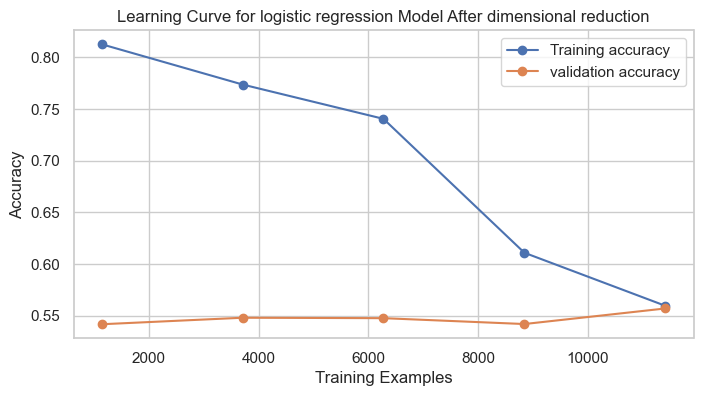

In [52]:
train_sizes, train_scores, test_scores = learning_curve(model,x,y,scoring='accuracy')
train_scores_mean=np.mean(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)

plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean,'o-',label='Training accuracy')
plt.plot(train_sizes, test_scores_mean,'o-',label='validation accuracy')
    
plt.title('Learning Curve for logistic regression Model After dimensional reduction')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [53]:
best_parameters ={'C': 20, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.75, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}
final_model = OneVsRestClassifier(LogisticRegression(**best_parameters))
final_model.fit(xtrain,ytrain)
final_ypred=final_model.predict(xtest)
prob=final_model.predict_proba(xtest)

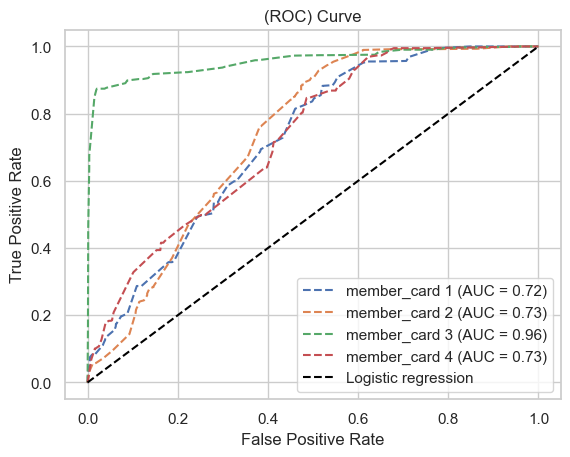

In [54]:
y_test_binarized = label_binarize(ytest, classes=np.unique(ytest))

fpr = {}
tpr = {}
thresh = {}
roc_auc = {}

n_class = y_test_binarized.shape[1]

# Plot ROC curve for each class
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'member_card {np.unique(ytest)[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Logistic regression')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend()
plt.show()